# Reading MERIS data (Sentinel 3 like format) from ENVISAT with Pytroll/Satpy

This example shows how to read and resample ENVISAT MERIS level 2 data (as can be obtained via the ESA Envisat MERIS dedicated Online Dissemination Service).

## Find the files and create the scene object
To find the files, we give the base directory containing the MERIS sentinel-like-format* directories, and filter by time to load just one segment.

In [1]:
import numpy as np
from datetime import datetime
from satpy import Scene, find_files_and_readers

files = find_files_and_readers(
    start_time=datetime(2005, 7, 10, 7, 10),
    end_time=datetime(2005, 7, 10, 12, 50),
    base_dir='C:/Temp/Satellit/meris_data',
    reader='meris_nc_sen3',
    sensor='meris',
)

scn = Scene(filenames=files)


## Loading datasets and visualizing one of the chlorophyll products (chl_nn)
Here we load and display it. It is in original data projection, no resampling has been performed yet. Note that chlorophyll data are stored as logarithmic values.

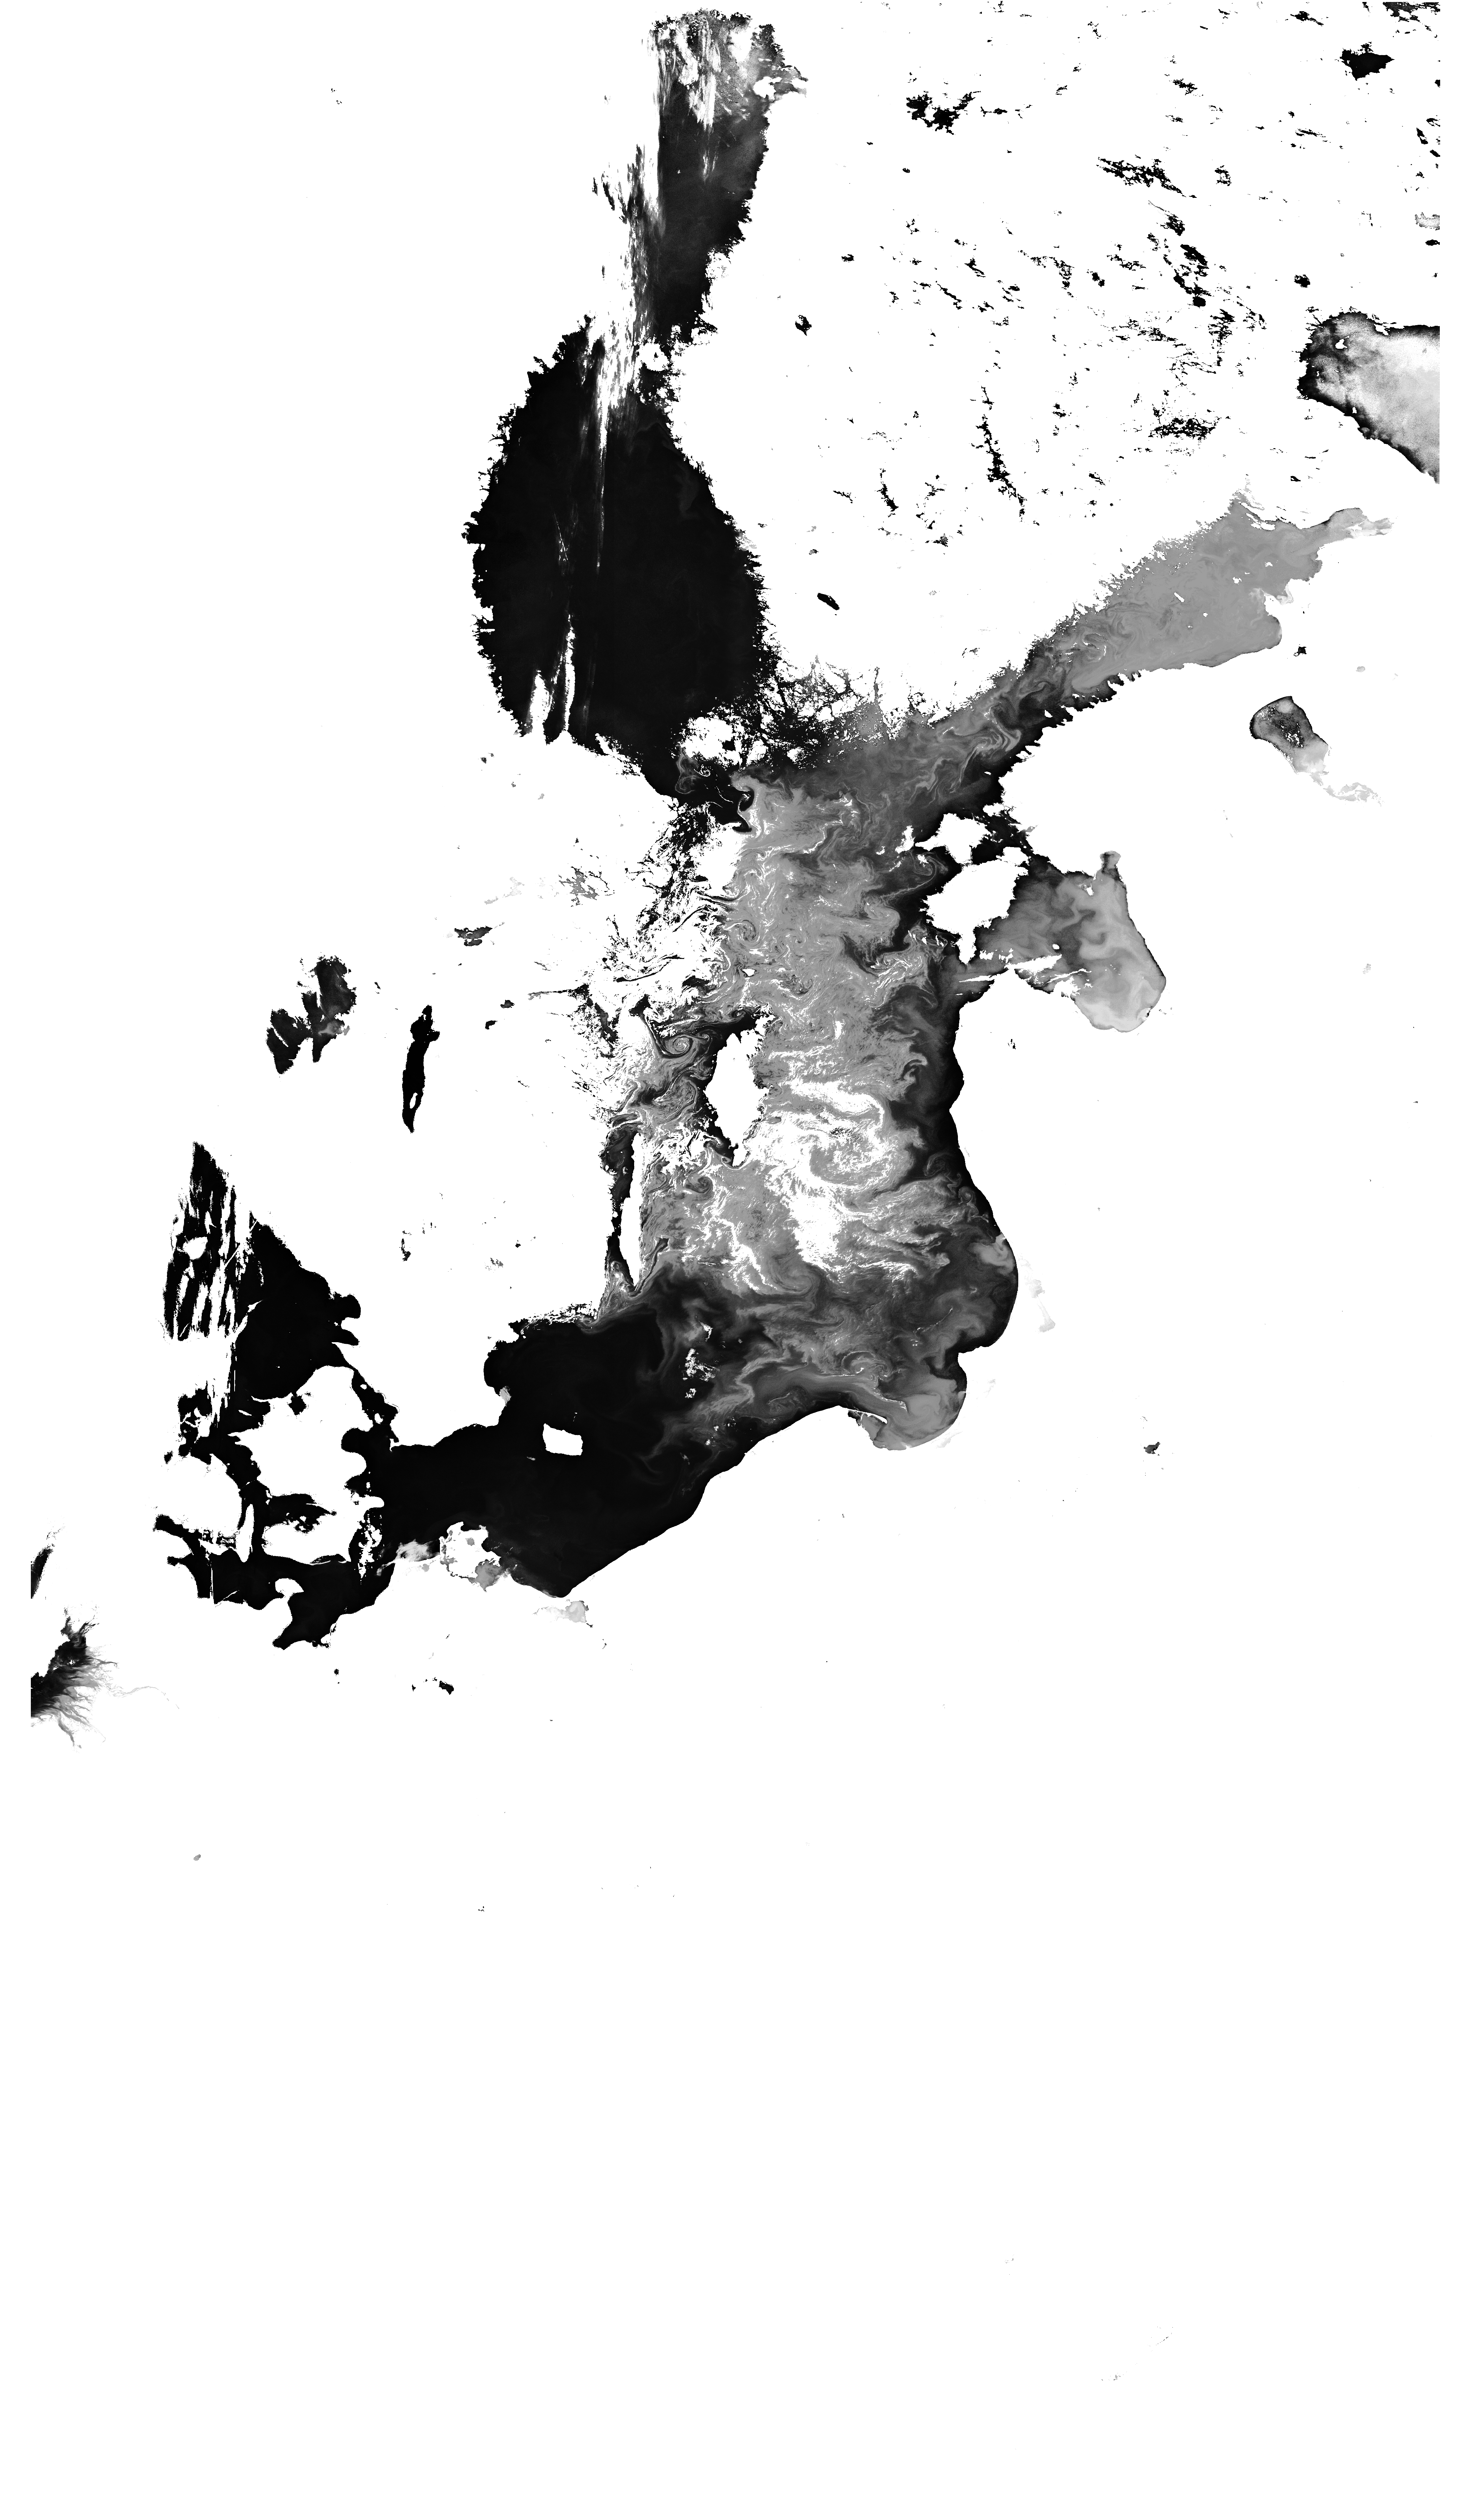

In [2]:
datasets = [
    'M07',
    'chl_nn',
    'chl_oc4me',
    'iop_nn',
    'trsp',
    'tsm_nn',
    'mask'
]
scn.load(datasets)

scn['chl_nn'] = np.power(10, scn['chl_nn'])
scn.show('chl_nn')